https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/Zackory/Keras-MNIST-GAN/blob/master/mnist_gan.py


In [4]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam, SGD, Adamax
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [5]:
tr_im = np.loadtxt("reals.dat")

In [6]:
tr_im.shape

(20000, 4000)

In [7]:
nrow,ncol = 80,50

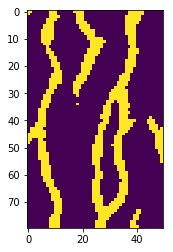

In [8]:
plt.imshow(tr_im[0,:].reshape((nrow,ncol)))

In [10]:
npar = 200 #number of standard normal deviates to feed to generator input

In [30]:
#opt = tf.train.AdamOptimizer(learning_rate=0.0005,beta1=0.5)
opt = Adam(lr=0.0002,beta_1=0.5)

In [31]:
tr_im.max(),tr_im.min()

(1.0, 0.0)

In [32]:
generator = Sequential()
generator.add(Dense(npar*8*5, input_shape=(npar,), kernel_initializer=keras.initializers.RandomNormal(stddev=0.002)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((npar, 8, 5)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(256, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(128, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(64, kernel_size=3, padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(5, 5)))
generator.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
generator.compile(loss='binary_crossentropy', optimizer=opt)
#generator.summary()


In [33]:
# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding='same', input_shape=(1, 80, 50), kernel_initializer=initializers.RandomNormal(mean=0.5,stddev=0.002)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.45))
discriminator.add(Conv2D(128, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.35))
discriminator.add(Conv2D(256, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.45))
discriminator.add(Conv2D(512, kernel_size=3, strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.45))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)
#discriminator.summary()

In [34]:
discriminator.trainable = False
gi = Input(shape=(npar,))
x = generator(gi)
go = discriminator(x)
gan = Model(inputs=gi,outputs=go)
gan.compile(loss="binary_crossentropy",optimizer=opt)

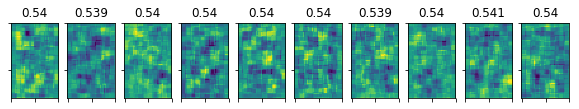

In [35]:

def plot_gen():
    fig, axes = plt.subplots(nrows=1,ncols=10,figsize = (10,10))
    plot_noise = np.random.randn(10,npar) 
    vecs = generator.predict(plot_noise)#.reshape(10,28,28)
    #print(vecs[0,:])
    isreal = discriminator.predict(vecs)
    #print(isreal.shape)
    for ax,vec,real in zip(axes.flatten(),vecs.reshape(10,nrow,ncol),isreal.flatten()):
        ax.imshow(vec)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title("{0:1.3G}".format(real))
plot_gen()
#generator.save("test.h5")
o_d = "gen_models"
if os.path.exists(o_d):
    shutil.rmtree(o_d)
os.mkdir(o_d)

78


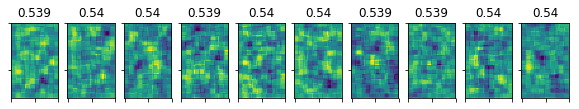

1 1.6735038 0.2900612448


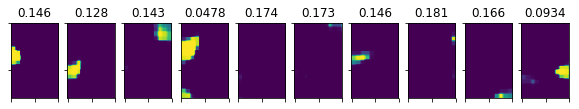

2 2.2523634 0.352422066


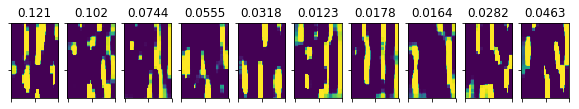

3 1.9452305 0.2819449339


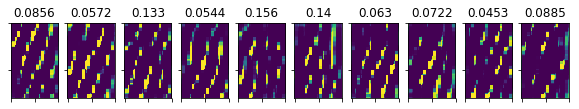

4 1.4108645 0.4586188428


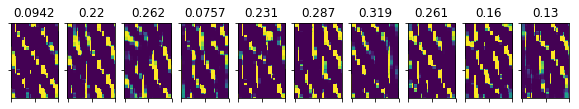

5 0.8645439 0.43802097740.3669886


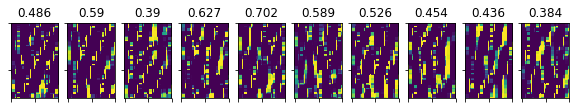

6 1.6389968 0.387681077


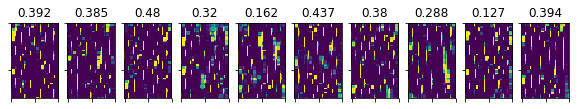

7 2.9400082 0.316089933


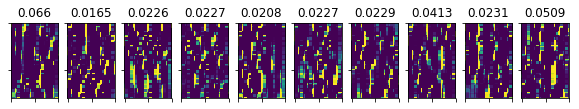

8 2.8439357 0.266336115


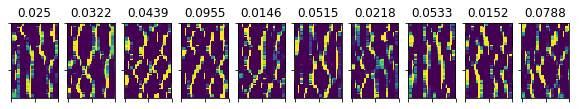

9 3.037184 0.2571553373


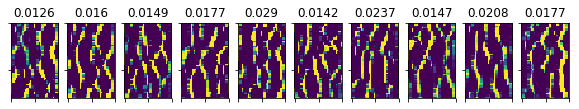

10 2.7344608 0.25449818


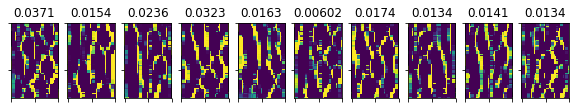

11 2.262035 0.259821183


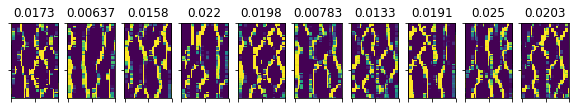

12 2.398282 0.254668748


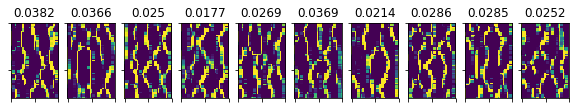

13 3.0367732 0.24771763


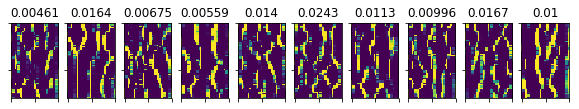

14 2.349465 0.243265728


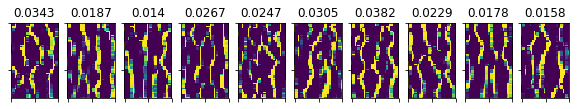

15 2.9564862 0.23989111


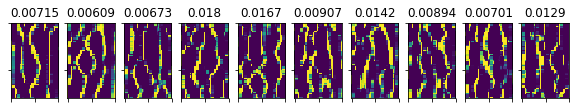

16 3.66395 0.2454349177


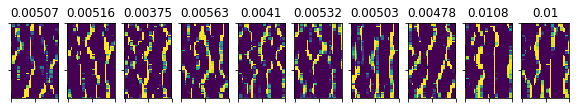

17 2.8812838 0.24010698


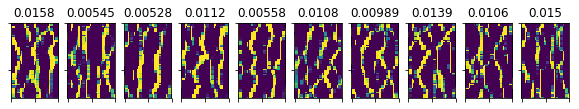

18 2.4101021 0.22983456


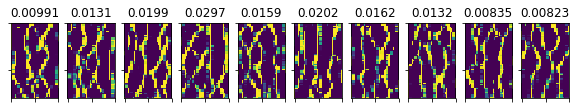

19 2.6838684 0.22435936


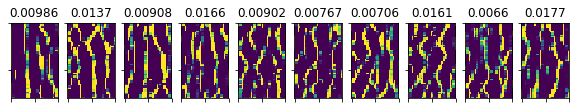

20 2.8908718 0.20788383


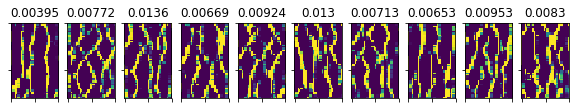

21 2.37815 0.2396114538


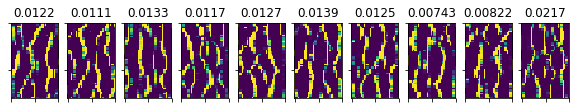

22 3.1237202 0.218718560.22280648


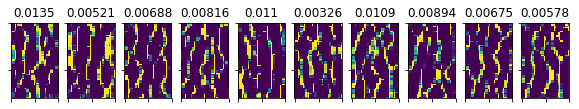

23 3.1614177 0.21419775


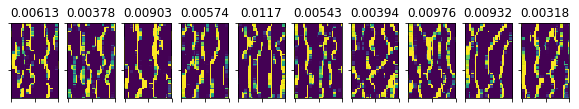

24 2.5577903 0.22299364


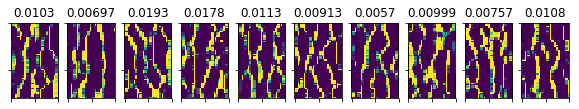

25 2.8348465 0.231408720.21901414


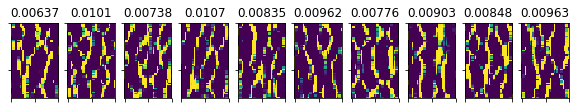

26 3.101904 0.233722948


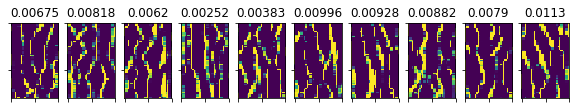

27 2.8852534 0.21985616


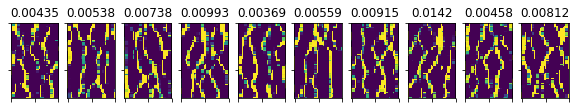

28 2.9308918 0.21274571


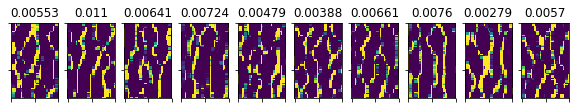

29 2.8413339 0.22780237


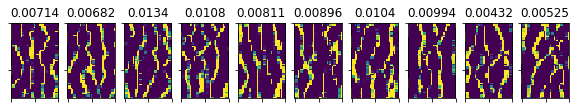

30 2.8191142 0.22455937


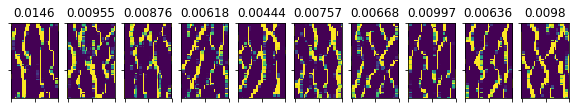

31 2.9071105 0.22063667


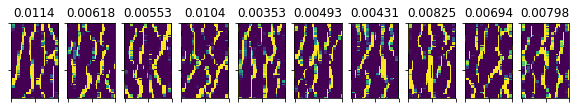

32 2.9568586 0.20895165


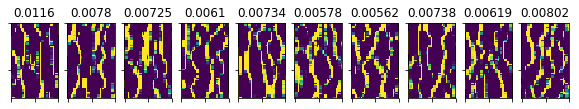

33 3.372264 0.218406625


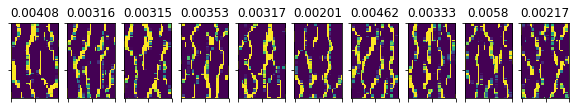

34 2.8803968 0.22498643


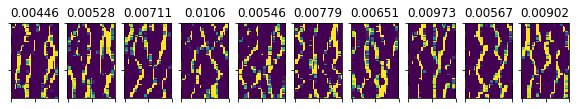

35 2.8006487 0.22020718


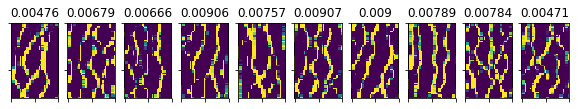

36 3.269799 0.222269557


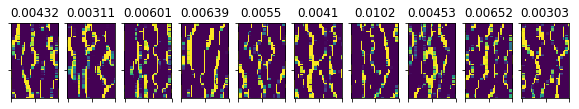

37 3.0491652 0.22362511


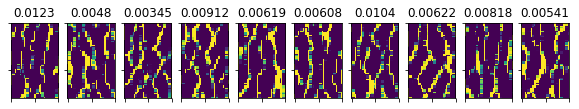

38 2.6448228 0.21690246


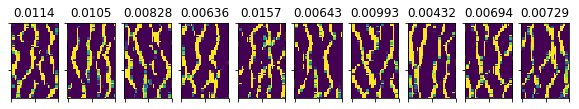

39 2.778248 0.216202471


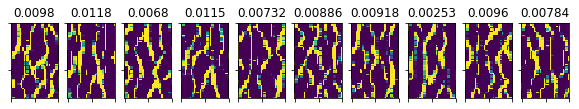

40 3.09364 0.2029473544


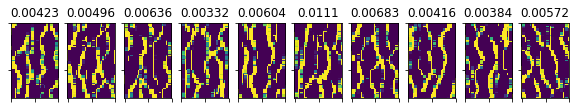

41 3.1003249 0.22069699


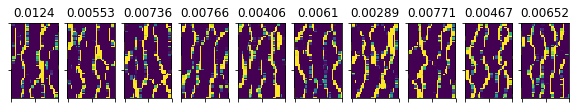

42 2.8363564 0.20446774


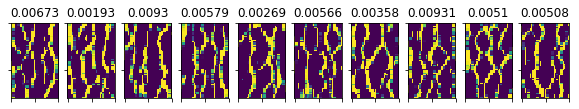

43 2.4778676 0.21794742


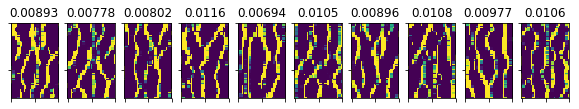

44 3.2962594 0.22175195


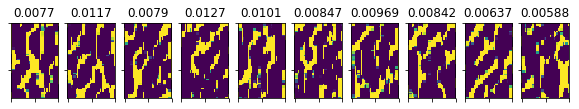

45 2.724796 0.229554738


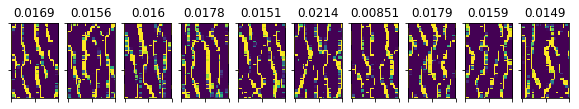

46 3.2429504 0.21319607


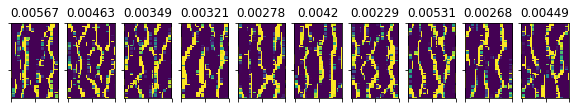

47 3.1290307 0.21384671


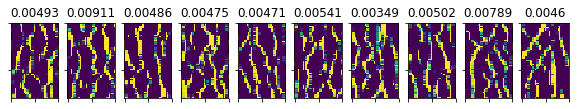

48 2.8840966 0.21933302


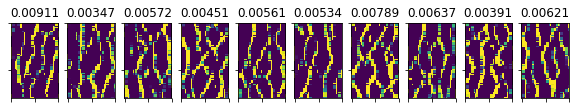

49 3.0177693 0.21409167


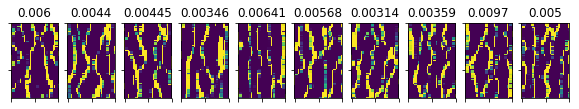

50 3.1239946 0.21504816


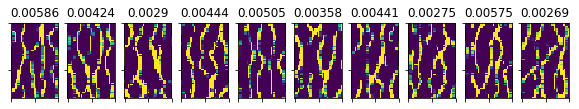

51 2.6822543 0.20968911


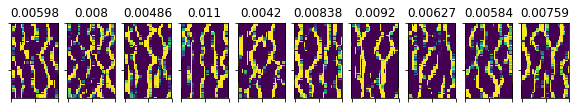

52 2.8390837 0.19931197


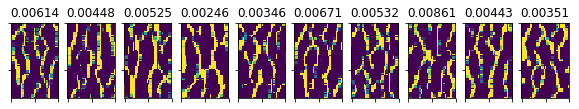

53 2.7956605 0.22612776


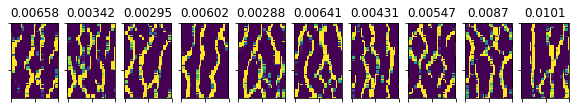

54 3.0889857 0.20542715


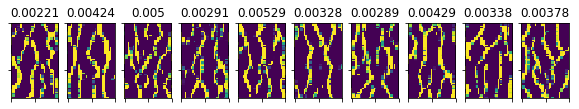

55 3.0554204 0.21647671


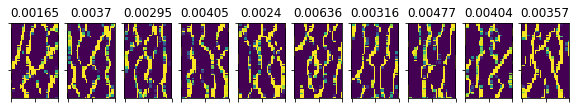

56 3.169128 0.222541937


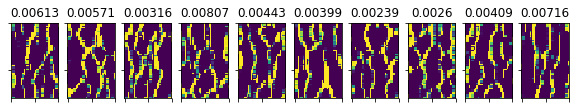

57 3.1329648 0.21298385


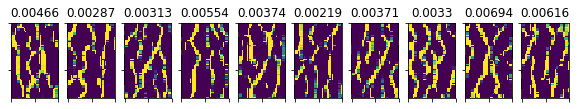

58 3.2152681 0.19549282


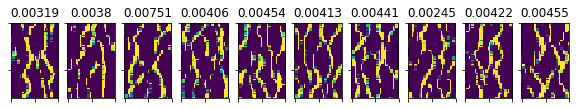

59 2.8749704 0.21454746


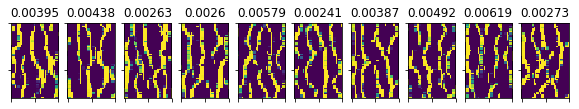

60 2.93516 0.2096733545


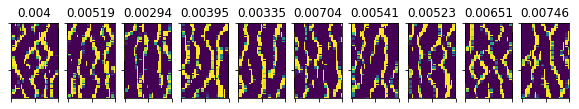

61 3.4332387 0.20185249


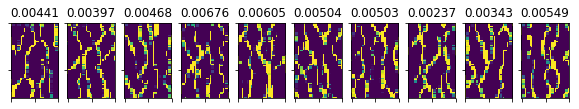

62 2.9359844 0.21776052


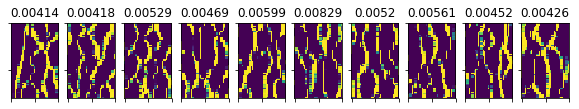

63 2.946024 0.212980756


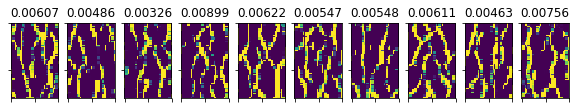

64 3.4083269 0.21096386


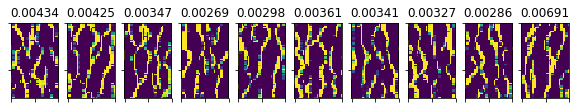

65 2.9027565 0.21187094


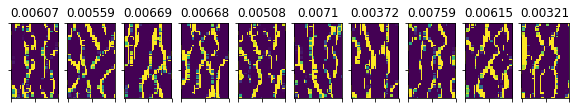

66 2.9619708 0.20586772


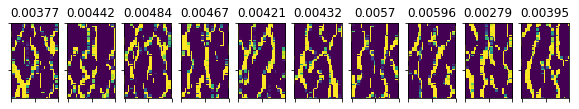

67 2.9288871 0.20255335


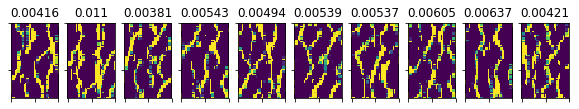

68 3.008078 0.216284511


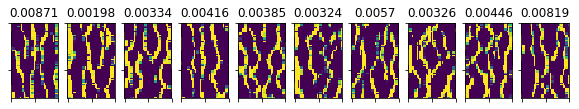

69 2.6377366 0.200639140.21506558


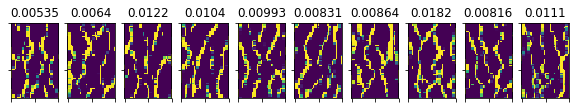

70 3.2458513 0.20934318


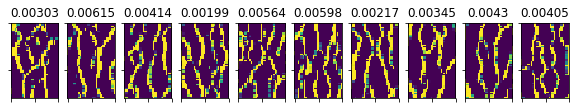

71 3.5230906 0.21716261


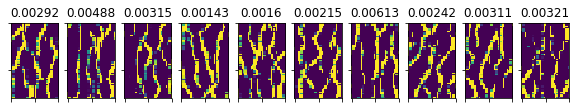

72 2.8460402 0.21085382


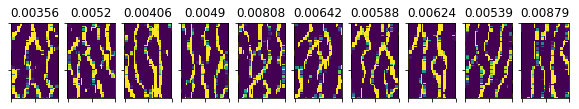

73 3.3520498 0.21059908


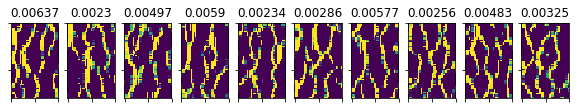

74 2.6651173 0.21411157


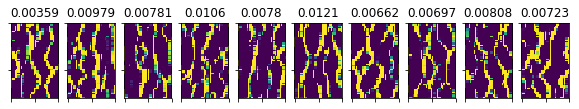

75 2.9979184 0.20612381


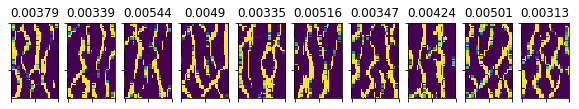

76 3.2986012 0.21441358


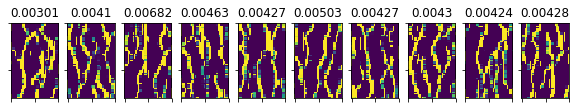

77 3.1119967 0.20581262


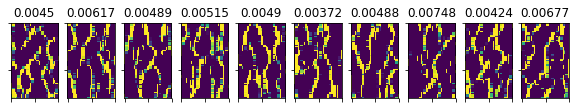

78 2.955361 0.212314626


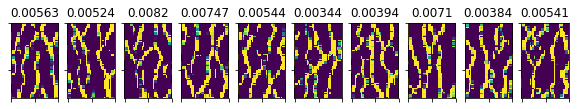

79 2.8370295 0.20257375


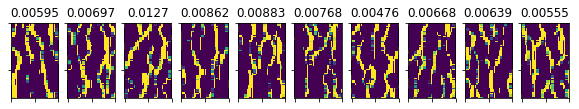

80 3.0401616 0.20793664 0.204096


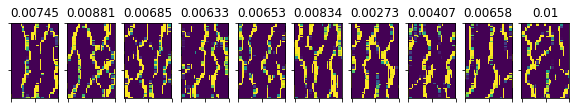

81 3.2614455 0.21506853


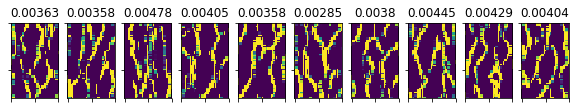

82 3.9420266 0.222456250.20739534


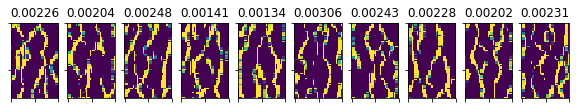

83 3.0415342 0.21434477


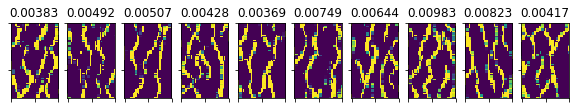

84 3.0102148 0.196898730.20948541


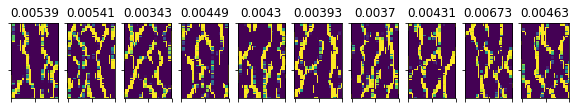

85 3.0165167 0.21240258


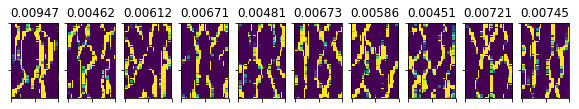

86 3.767069 0.226625064 0.21269491


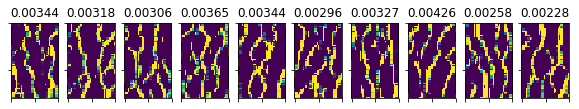

87 3.358424 0.215617167


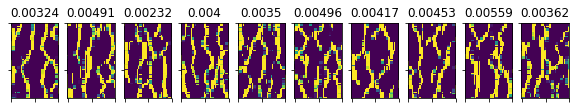

88 2.8992758 0.20979866


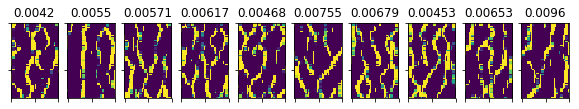

89 2.642241 0.212799975


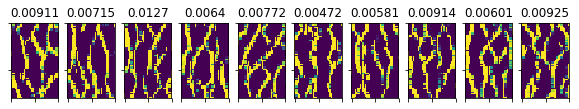

90 2.9117775 0.21624695


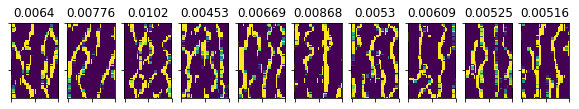

91 3.265736 0.213635125


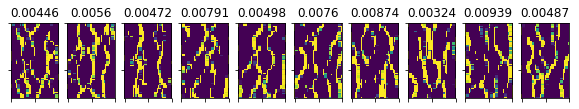

92 2.7763066 0.21382272


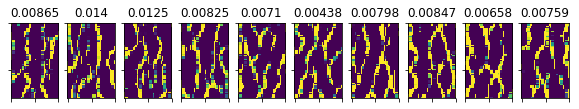

93 2.9908137 0.20705311


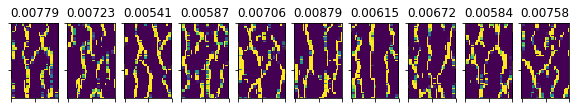

94 3.036489 0.212705228


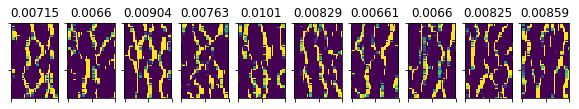

95 3.406022 0.214299781


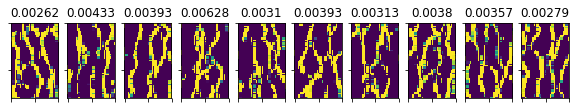

96 2.8519788 0.20645049


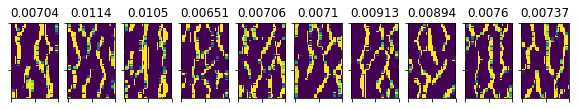

97 2.8179758 0.22079101


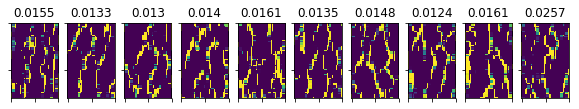

98 2.9883602 0.21194637


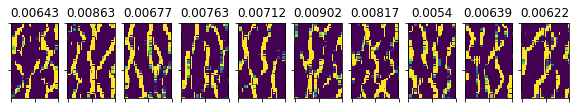

99 2.9213421 0.20481977


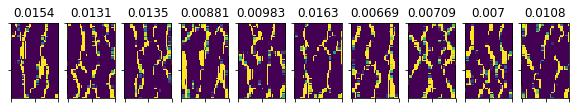

In [41]:
batch_size = 256
assert batch_size % 2 == 0
half_batch_size = int(batch_size / 2)
batch_count = int(tr_im.shape[0] / batch_size)
print(batch_count)
plot_gen()
plt.show()
for e in range(1,100):
    for bc in range(batch_count):
        noise = np.random.randn(half_batch_size,npar)
        tr_im_batch = tr_im[np.random.randint(0,tr_im.shape[0],size=half_batch_size)]
        gen_im = generator.predict(noise)
        tr_im_batch = np.resize(tr_im_batch,(half_batch_size,1,nrow,ncol))
        #print(gen_im.shape,tr_im_batch.shape)
        tr_im_batch = np.concatenate([tr_im_batch,gen_im])
        #noisy labels and flipped labels...
        tr_im_lab = np.zeros(batch_size)
        if False:#np.random.rand(1) <= 0.025:
            tr_im_lab[half_batch_size:] = np.random.uniform(0.9,1.0,size=half_batch_size)
            tr_im_lab[:half_batch_size] = np.random.uniform(0.0,0.1,size=half_batch_size)
        else:
            tr_im_lab[:half_batch_size] = np.random.uniform(0.9,1.0,size=half_batch_size)
            tr_im_lab[half_batch_size:] = np.random.uniform(0.0,0.1,size=half_batch_size)
        if True:# bc % 5 == 0:
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(tr_im_batch,tr_im_lab)
        noise = np.random.randn(batch_size,npar)
        tr_img_lab = np.ones(batch_size)
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise,tr_img_lab)
        print(bc,gloss,dloss,end="\r")
    if e % 1 == 0:
        print(e,gloss,dloss)
        plot_gen()
        plt.show()
        generator.save(os.path.join(o_d,"gen_{0}.h5").format(e))
        
    